In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [90]:
from src.vit_data import load_cd_data_24x128
data = load_cd_data_24x128()

In [95]:
img_data = data.all_imgs.numpy()

In [96]:
img_data.shape

(26562, 1, 24, 128)

In [127]:
from src.find_small_plus1 import find_p1
from src.find_small_plus1 import find_small_prom
from src.timer import Timer

timer = Timer()
n = len(img_data)
pos_data = pd.DataFrame(index=range(n))

for i in range(n):
    p1_pos = find_p1(img_data, i, plot=False)
    small_pos = find_small_prom(img_data, i, False)
    
    pos_data.loc[i, 'p1'] = p1_pos
    pos_data.loc[i, 'small'] = small_pos
    
    timer.print_progress(i, n, every=5000)


0/26562 - 00:00:00.00
5000/26562 - 00:00:09.78
10000/26562 - 00:00:19.40
15000/26562 - 00:00:28.98
20000/26562 - 00:00:38.55
25000/26562 - 00:00:48.11


In [128]:
pos_data.head()

,p1,small
0,-96.0,16.0
1,136.0,-104.0
2,-160.0,-24.0
3,136.0,-160.0
4,24.0,-96.0


0

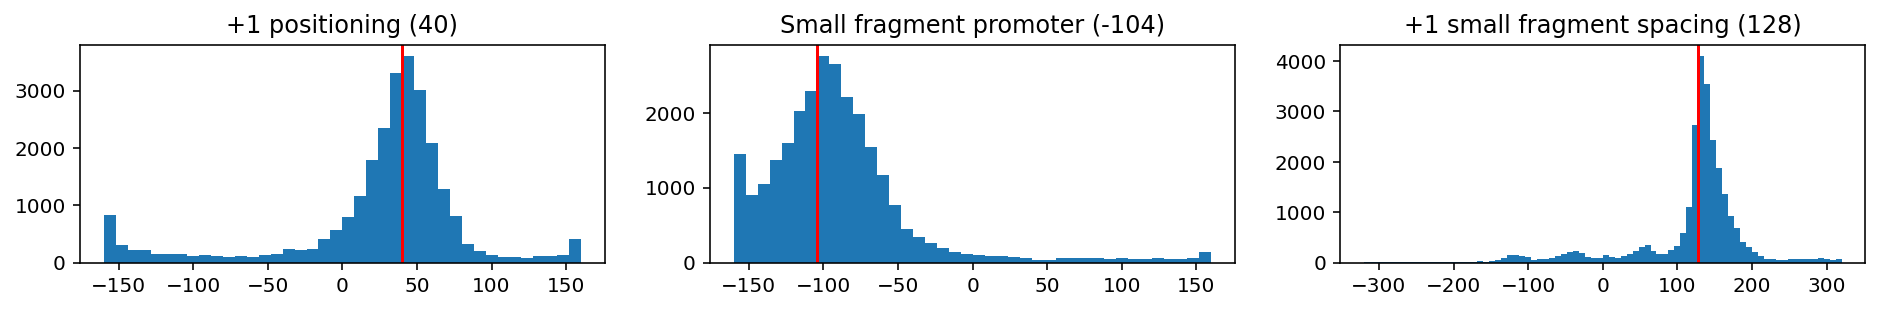

In [165]:
plt.figure(figsize=(16, 2))
plt.subplot(1, 3, 1)
h = plt.hist(pos_data['p1'], bins=40)
pos_max = h[1][h[0].argmax()]
plt.axvline(pos_max, c='red')
plt.title(f"+1 positioning ({pos_max:.0f})")

plt.subplot(1, 3, 2)
h = plt.hist(pos_data['small'], bins=40)
pos_max = h[1][h[0].argmax()]
plt.axvline(pos_max, c='red')
plt.title(f"Small fragment promoter ({pos_max:0.0f})")

plt.subplot(1, 3, 3)
h = plt.hist(pos_data['p1']-pos_data['small'], bins=80)
pos_max = h[1][h[0].argmax()]
plt.axvline(pos_max, c='red')
plt.title(f"+1 small fragment spacing ({pos_max:.0f})")
0

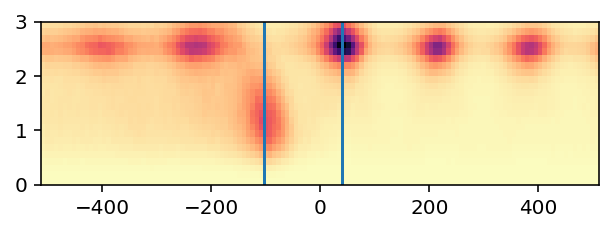

In [167]:
plt.figure(figsize=(5, 1.5))
plt.imshow(img_data.sum(axis=0)[0], origin='lower', cmap='magma_r', 
           extent=[-512, 512, 0, 3], aspect='auto')
plt.axvline(40)
plt.axvline(-104)


In [180]:
pos_data.head(2)

,p1,small
0,-96.0,16.0
1,136.0,-104.0


In [229]:
shp = img_data.shape
padding = 20

padded = np.zeros((shp[0], shp[1], shp[2], shp[3]+padding*2))-1
padded.shape

(26562, 1, 24, 168)

In [230]:
scale = 1024//img_data.shape[3]

timer = Timer()
n = len(padded)

for i in range(n):
    p1_idx_adjust = int(pos_data.loc[i].p1 // scale)
    cur_img = img_data[i]
    new_pos = padding-p1_idx_adjust
    padded[i, :, :, new_pos:(new_pos+img_data.shape[3])] = cur_img


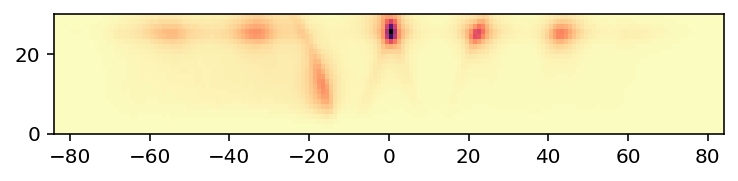

In [231]:
plt.imshow(padded[:, 0].sum(axis=0), origin='lower', cmap='magma_r', extent=[-84, 84, 0, 30])

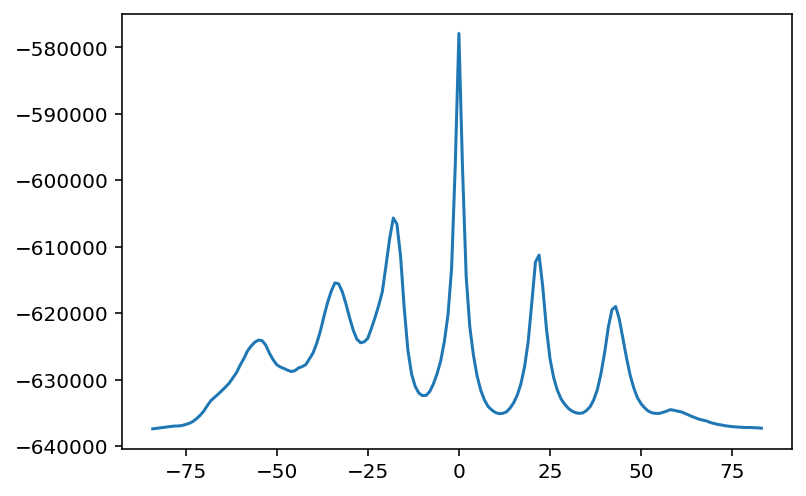

In [246]:
plt.plot(np.arange(-84, 84), padded.sum(axis=2)[:, 0].sum(axis=0))